<a name="summary"></a>
### Summary

This code includes all the models implemented for the Reliance Industries Ltd dataset.

# Imports

In [ ]:
import pandas as pd
import numpy as np
import math
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

# ! pip install plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Dataset Setup

In [ ]:
# Import dataset
bist100 = pd.read_csv("RELIANCE.csv")
bist100.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-19,2141.000000,2154.000000,2121.350098,2131.550049,2124.715088,15731396.0
1,2020-08-20,2120.000000,2123.899902,2088.000000,2097.050049,2090.325684,10401212.0
2,2020-08-21,2118.000000,2122.000000,2077.000000,2081.850098,2075.174316,11667129.0
3,2020-08-24,2091.399902,2104.500000,2070.500000,2095.750000,2089.029785,15098991.0
4,2020-08-25,2106.000000,2111.300049,2078.000000,2082.100098,2075.423584,8947563.0


In [ ]:
# Rename columns
bist100.rename(columns={"Date":"date","Open":"open","High":"high","Low":"low","Close":"close"}, inplace= True)
bist100.head()

,date,open,high,low,close,Adj Close,Volume
0,2020-08-19,2141.000000,2154.000000,2121.350098,2131.550049,2124.715088,15731396.0
1,2020-08-20,2120.000000,2123.899902,2088.000000,2097.050049,2090.325684,10401212.0
2,2020-08-21,2118.000000,2122.000000,2077.000000,2081.850098,2075.174316,11667129.0
3,2020-08-24,2091.399902,2104.500000,2070.500000,2095.750000,2089.029785,15098991.0
4,2020-08-25,2106.000000,2111.300049,2078.000000,2082.100098,2075.423584,8947563.0


In [ ]:
# Checking null value
bist100.isnull().sum()

date         0
open         1
high         1
low          1
close        1
Adj Close    1
Volume       1
dtype: int64

In [ ]:
# Checking na value
bist100.isna().any()

date         False
open          True
high          True
low           True
close         True
Adj Close     True
Volume        True
dtype: bool

In [ ]:
bist100.dropna(inplace=True)
bist100.isna().any()

date         False
open         False
high         False
low          False
close        False
Adj Close    False
Volume       False
dtype: bool

In [ ]:
# Checking Data type of each column
print("Date column data type: ", type(bist100['date'][0]))
print("Open column data type: ", type(bist100['open'][0]))
print("Close column data type: ", type(bist100['close'][0]))
print("High column data type: ", type(bist100['high'][0]))
print("Low column data type: ", type(bist100['low'][0]))

Date column data type:  <class 'str'>
Open column data type:  <class 'numpy.float64'>
Close column data type:  <class 'numpy.float64'>
High column data type:  <class 'numpy.float64'>
Low column data type:  <class 'numpy.float64'>


In [ ]:
# convert date field from string to Date format and make it index
# remember to look into data format

bist100['date'] = pd.to_datetime(bist100.date)

# bist100['date'] = pd.to_datetime(bist100.date,format='%d-%m-%Y')
bist100.head()

,date,open,high,low,close,Adj Close,Volume
0,2020-08-19,2141.000000,2154.000000,2121.350098,2131.550049,2124.715088,15731396.0
1,2020-08-20,2120.000000,2123.899902,2088.000000,2097.050049,2090.325684,10401212.0
2,2020-08-21,2118.000000,2122.000000,2077.000000,2081.850098,2075.174316,11667129.0
3,2020-08-24,2091.399902,2104.500000,2070.500000,2095.750000,2089.029785,15098991.0
4,2020-08-25,2106.000000,2111.300049,2078.000000,2082.100098,2075.423584,8947563.0


In [ ]:
bist100.sort_values(by='date', inplace=True)
bist100.head()

,date,open,high,low,close,Adj Close,Volume
0,2020-08-19,2141.000000,2154.000000,2121.350098,2131.550049,2124.715088,15731396.0
1,2020-08-20,2120.000000,2123.899902,2088.000000,2097.050049,2090.325684,10401212.0
2,2020-08-21,2118.000000,2122.000000,2077.000000,2081.850098,2075.174316,11667129.0
3,2020-08-24,2091.399902,2104.500000,2070.500000,2095.750000,2089.029785,15098991.0
4,2020-08-25,2106.000000,2111.300049,2078.000000,2082.100098,2075.423584,8947563.0


In [ ]:
bist100.shape

(249, 7)

# EDA

In [ ]:
print("Starting date: ",bist100.iloc[0][0])
print("Ending date: ", bist100.iloc[-1][0])
print("Duration: ", bist100.iloc[-1][0]-bist100.iloc[0][0])

Starting date:  2020-08-19 00:00:00
Ending date:  2021-08-18 00:00:00
Duration:  364 days 00:00:00


In [ ]:
monthvise= bist100.groupby(bist100['date'].dt.strftime('%B'))[['open','close']].mean().sort_values(by='close')
monthvise.head()

,open,close
date,,
January,1968.000006,1957.662494
April,1963.384207,1961.278956
November,1985.213160,1964.847367
May,1967.050006,1972.582513
December,1980.765897,1978.338645


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock actual, open and close price')
fig.show()

In [ ]:
bist100.groupby(bist100['date'].dt.strftime('%B'))['low'].min()


date
April        1876.699951
August       2041.150024
December     1855.250000
February     1848.000000
January      1830.000000
July         2016.250000
June         2081.000000
March        1973.699951
May          1906.000000
November     1835.099976
October      1991.000000
September    2044.250000
Name: low, dtype: float64

In [ ]:
monthvise_high= bist100.groupby(bist100['date'].dt.strftime('%B'))['high'].max()
monthvise_low= bist100.groupby(bist100['date'].dt.strftime('%B'))['low'].min()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(bist100, x=bist100.date, y=[bist100['open'], bist100['close'], 
                                          bist100['high'], bist100['low']],
             labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
closedf = bist100[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (249, 2)


In [ ]:
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.6)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
close_stock = closedf.copy()
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(249, 1)


In [ ]:
training_size=int(len(closedf)*0.65)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (161, 1)
test_data:  (88, 1)


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (145, 15)
y_train:  (145,)
X_test:  (72, 15)
y_test (72,)


In [ ]:
# # Plot actual vs predicted prices
# plt.plot(test_data, label='Actual')
# plt.plot(predictions, label='Predicted')
# plt.legend()
# plt.show()


# FB prophet

In [ ]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [ ]:
# !pip install pystan~=2.14
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 54.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826145 sha256=068c00d262b30b2e4af41fb14d45433945f79ee21e2ceb9669f564bd6062fd71
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 144.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436833 sha256=56c8036dbc7d7240a3ae5993aeaf57f96ffd1d3fd819f9252dc37653a1336737
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff395998

In [ ]:
print(bist100)
print(training_size)

          date         open         high          low        close  \
0   2020-08-19  2141.000000  2154.000000  2121.350098  2131.550049   
1   2020-08-20  2120.000000  2123.899902  2088.000000  2097.050049   
2   2020-08-21  2118.000000  2122.000000  2077.000000  2081.850098   
3   2020-08-24  2091.399902  2104.500000  2070.500000  2095.750000   
4   2020-08-25  2106.000000  2111.300049  2078.000000  2082.100098   
..         ...          ...          ...          ...          ...   
245 2021-08-12  2124.899902  2126.199951  2105.000000  2110.500000   
246 2021-08-13  2117.300049  2149.899902  2108.949951  2145.649902   
247 2021-08-16  2149.350098  2203.000000  2128.149902  2173.500000   
248 2021-08-17  2168.850098  2185.199951  2147.850098  2164.250000   
249 2021-08-18  2174.000000  2186.800049  2152.600098  2172.649902   

       Adj Close      Volume  
0    2124.715088  15731396.0  
1    2090.325684  10401212.0  
2    2075.174316  11667129.0  
3    2089.029785  15098991.0  
4   

In [ ]:
data_fb = bist100[["date", "close"]]

train_data = data_fb.iloc[:training_size, :]
test_data = data_fb.iloc[training_size:, ]

train_data = train_data.rename(columns={"date": "ds", "close": "y"})
print(train_data)
print(test_data)

            ds            y
0   2020-08-19  2131.550049
1   2020-08-20  2097.050049
2   2020-08-21  2081.850098
3   2020-08-24  2095.750000
4   2020-08-25  2082.100098
..         ...          ...
157 2021-04-06  1984.300049
158 2021-04-07  2002.849976
159 2021-04-08  2005.349976
160 2021-04-09  1982.050049
161 2021-04-12  1911.150024

[161 rows x 2 columns]
          date        close
162 2021-04-13  1931.800049
163 2021-04-15  1944.300049
164 2021-04-16  1932.099976
165 2021-04-19  1901.699951
166 2021-04-20  1901.150024
..         ...          ...
245 2021-08-12  2110.500000
246 2021-08-13  2145.649902
247 2021-08-16  2173.500000
248 2021-08-17  2164.250000
249 2021-08-18  2172.649902

[88 rows x 2 columns]


In [96]:
print(len(train_data))
print(len(test_data))

161
88


In [106]:
import pandas as pd
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Instantiate the Prophet model with specified parameters (if any)
model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
# model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
# model = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)

# Fit the model to the dataset
model.fit(train_data)

# Create a dataframe to hold future predictions
future = model.make_future_dataframe(periods=len(test_data), freq='d')

# Make predictions for the future period only
forecast = model.predict(future[-len(test_data):])

# Extract the predicted values
predicted_stock_prices = forecast[['ds', 'yhat']]


/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [107]:
print(len(forecast))

88


In [108]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-04-13,1922.487067,1897.070831,2008.081604,1922.487067,1922.487067,30.414341,30.414341,30.414341,43.25554,...,1.990846,1.990846,1.990846,-14.832045,-14.832045,-14.832045,0.0,0.0,0.0,1952.901408
1,2021-04-14,1921.568729,1899.899365,2010.873418,1921.568729,1921.568729,33.306072,33.306072,33.306072,43.25554,...,6.434816,6.434816,6.434816,-16.384284,-16.384284,-16.384284,0.0,0.0,0.0,1954.874800
2,2021-04-15,1920.650391,1898.539826,2009.936438,1920.650389,1920.650393,33.205411,33.205411,33.205411,43.25554,...,6.818004,6.818004,6.818004,-16.868134,-16.868134,-16.868134,0.0,0.0,0.0,1953.855801
3,2021-04-16,1919.732053,1892.077547,2008.282024,1919.732048,1919.732058,31.310753,31.310753,31.310753,43.25554,...,4.188338,4.188338,4.188338,-16.133125,-16.133125,-16.133125,0.0,0.0,0.0,1951.042806
4,2021-04-17,1918.813715,1885.152405,1999.215117,1918.813707,1918.813723,23.799208,23.799208,23.799208,43.25554,...,-5.406942,-5.406942,-5.406942,-14.049389,-14.049389,-14.049389,0.0,0.0,0.0,1942.612923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2021-07-05,1846.265009,1602.344929,1709.295343,1846.263945,1846.266042,-185.350936,-185.350936,-185.350936,43.25554,...,-8.618119,-8.618119,-8.618119,-219.988356,-219.988356,-219.988356,0.0,0.0,0.0,1660.914073
84,2021-07-06,1845.346671,1582.817282,1696.507092,1845.345583,1845.347720,-203.409621,-203.409621,-203.409621,43.25554,...,1.990846,1.990846,1.990846,-248.656007,-248.656007,-248.656007,0.0,0.0,0.0,1641.937049
85,2021-07-07,1844.428333,1563.797456,1672.773220,1844.427219,1844.429397,-222.817418,-222.817418,-222.817418,43.25554,...,6.434816,6.434816,6.434816,-272.507774,-272.507774,-272.507774,0.0,0.0,0.0,1621.610915
86,2021-07-08,1843.509995,1546.880652,1658.510311,1843.508853,1843.511074,-240.907543,-240.907543,-240.907543,43.25554,...,6.818004,6.818004,6.818004,-290.981087,-290.981087,-290.981087,0.0,0.0,0.0,1602.602452


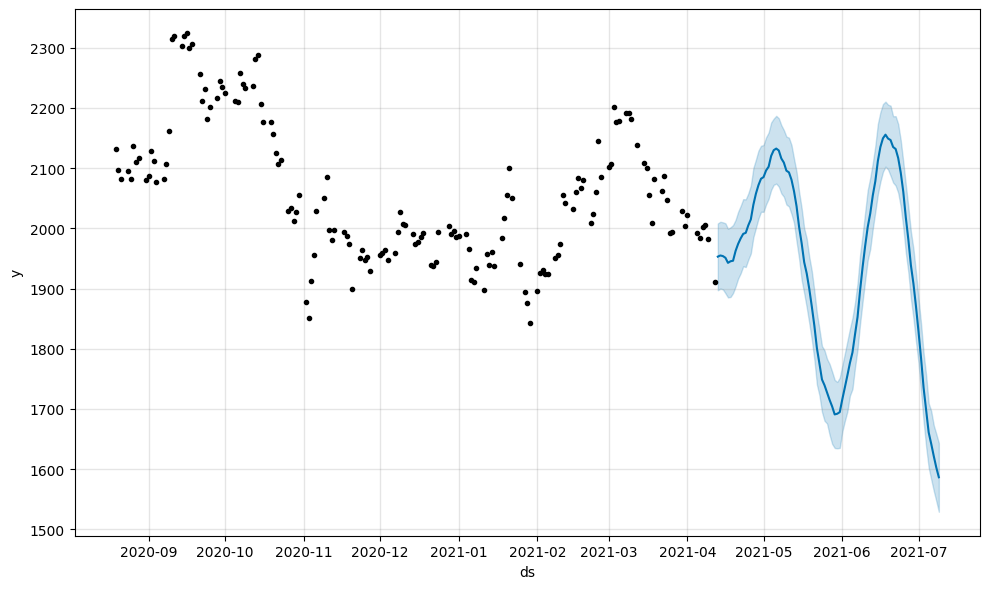

In [109]:
fig = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



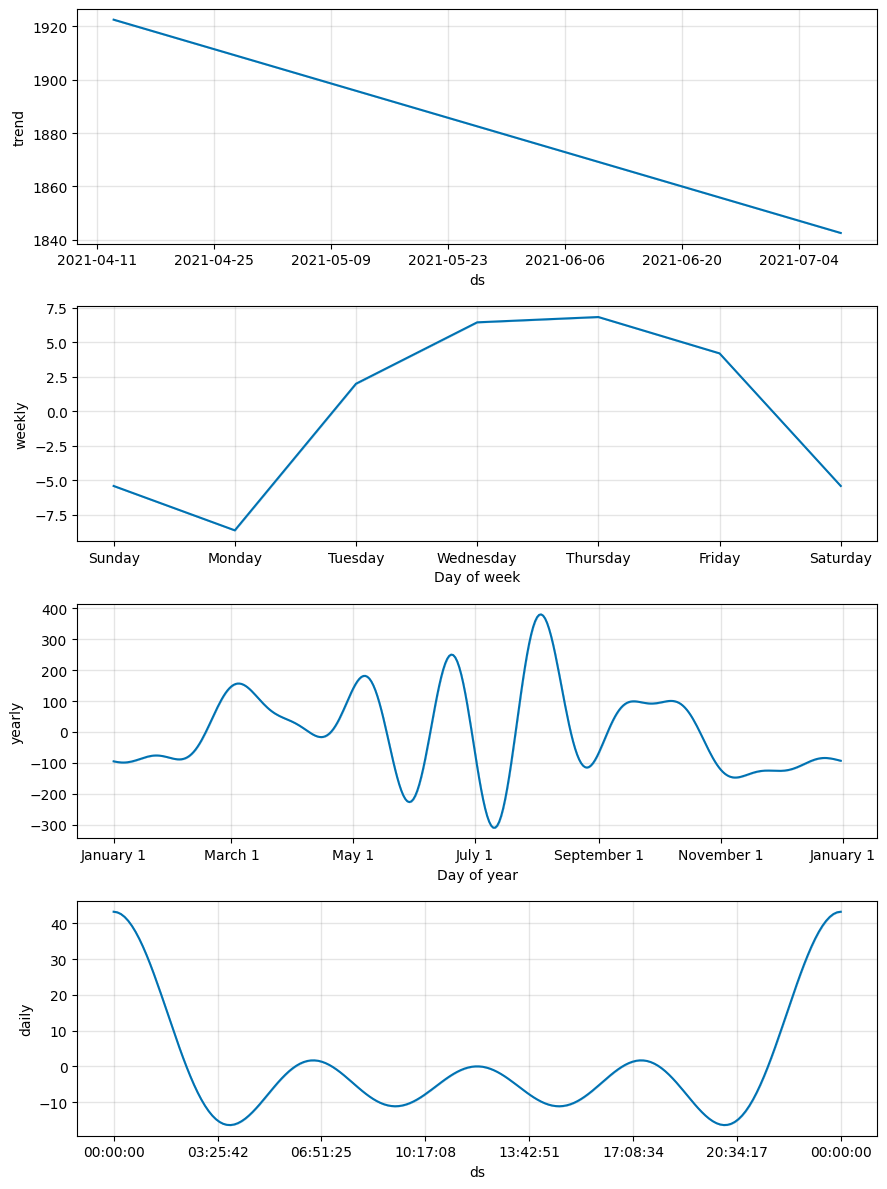

In [110]:
model.plot_components(forecast);

In [111]:
from fbprophet.plot import plot_plotly
plot_plotly(model, forecast)

In [84]:
test_predict = np.array(predicted_stock_prices['yhat']).reshape(-1, 1)
# train_predict = np.array(train_predict_prices['yhat']).reshape(-1, 1)
len(test_predict)


88

In [91]:
# # shift train predictions for plotting
# # look_back=time_step
# # trainPredictPlot = np.empty((len(train_predict), 1))
# # trainPredictPlot[:, :] = np.nan
# # trainPredictPlot[:len(train_predict), :] = train_predict

# # print("Train predicted data: ", trainPredictPlot.shape)

# # shift test predictions for plotting
# testPredictPlot = np.empty((len(test_predict), 1))
# testPredictPlot[:, :] = np.nan
# testPredictPlot[:len(test_predict), :] = test_predict

# print("Test predicted data: ", testPredictPlot.shape)

# names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

# # combinedPredictions = np.concatenate((trainPredictPlot, testPredictPlot))
# combinedPredictions = testPredictPlot


# new_date_range = pd.date_range(start=close_stock['date'].iloc[0], periods=len(combinedPredictions), freq='B')

# original_close_modified = np.empty((len(new_date_range), 1))
# original_close_modified[:] = np.nan
# original_close_modified[:len(close_stock['close']), :] = close_stock['close'].values.reshape(-1, 1)

# plotdf = pd.DataFrame({'date': new_date_range,
#                        'original_close': original_close_modified.reshape(1, -1)[0].tolist(),
#                        'combined_predicted_close': combinedPredictions.reshape(1, -1)[0].tolist()})

# fig = px.line(plotdf, x='date', y=['original_close', 'combined_predicted_close'],
#               labels={'value': 'Stock price', 'date': 'Date'})
# fig.update_layout(title_text='Comparision between original close price vs predicted close price',
#                   plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
# fig.for_each_trace(lambda t:  t.update(name = next(names)))

# fig.update_xaxes(showgrid=False)
# fig.update_yaxes(showgrid=False)
# fig.show()

In [112]:
mean_squared_error(test_data.close, forecast.yhat)

71722.32019868883

In [113]:
test_data.close, forecast.yhat

(162    1931.800049
 163    1944.300049
 164    1932.099976
 165    1901.699951
 166    1901.150024
           ...     
 245    2110.500000
 246    2145.649902
 247    2173.500000
 248    2164.250000
 249    2172.649902
 Name: close, Length: 88, dtype: float64,
 0     1952.901408
 1     1954.874800
 2     1953.855801
 3     1951.042806
 4     1942.612923
          ...     
 83    1660.914073
 84    1641.937049
 85    1621.610915
 86    1602.602452
 87    1586.409112
 Name: yhat, Length: 88, dtype: float64)

In [61]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='20 days', period='180 days', horizon = '150 days')


INFO:prophet:Making 1 forecasts with cutoffs between 2020-11-13 00:00:00 and 2020-11-13 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [62]:
# Python
df_cv.head()


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-11-17,1398.907986,1352.828747,1443.979440,1993.250000,2020-11-13
1,2020-11-18,1109.740634,1062.196522,1158.371185,1987.199951,2020-11-13
2,2020-11-19,705.209300,656.526410,751.303084,1973.150024,2020-11-13
3,2020-11-20,203.879790,156.644251,251.199780,1899.500000,2020-11-13
4,2020-11-23,-2195.007073,-2244.206508,-2144.859687,1950.699951,2020-11-13


In [63]:
# Python
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,14 days,2.874678e+07,5361.602711,4279.299811,2.198037,2.125241,1.497352,0.0
1,18 days,7.161225e+07,8462.402370,6396.651615,3.281786,2.691839,1.680639,0.0
2,19 days,1.289162e+08,11354.127535,8824.351541,4.522307,3.382739,1.839898,0.0
3,20 days,2.043561e+08,14295.315856,11582.098680,5.926750,4.174569,1.956920,0.0
4,21 days,3.017884e+08,17372.058637,14689.347180,7.520464,5.132946,2.000000,0.0


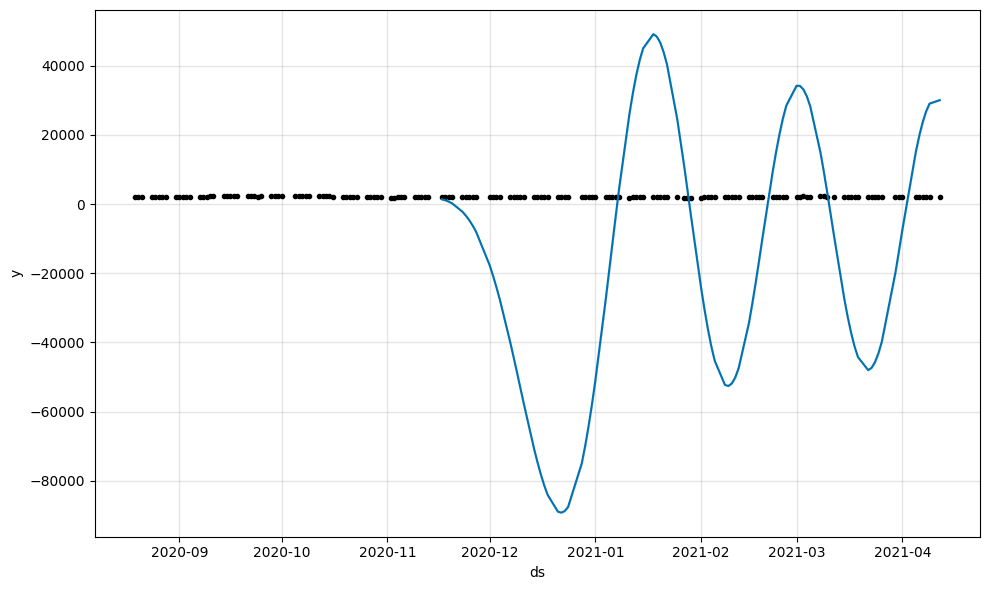

In [65]:
fig = model.plot(df_cv)